# Comparing cDC2A/B data from Brown et al. 2019 to those in our atlas

In [1]:
#load packages I need
import os
import tools
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import scanpy.external as sce
from matplotlib.pyplot import rc_context
import seaborn as sns

from scipy.stats import zscore

In [2]:
#set current directory 
os.chdir('/scratch/user/s4436039/scdata/Brown_Minutti_Data/')
os.getcwd()

'/scratch/user/s4436039/scdata/Brown_Minutti_Data'

In [3]:
data_Brown = sc.read_h5ad('brown_GSE137710.h5ad') #mouse BM, lung, spleen data with genes converted to human format
data_Minutti = sc.read_h5ad('minutti_GSE217328_humanized.h5ad') #human spleen data (from sorted pre-cDCs)

# Make heatmap figure --> showing my cDC2A/B sigs (calculated from atlas) on these datasets

In [5]:
data_DC2

AnnData object with n_obs × n_vars = 16643 × 2001
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'NR_annotations_simple', 'sample_type_major2', 'cancer_with_H', 'cancer_broadest', 'patient_treatment', 'Guimaraes_DC2_FCER1A', 'Guimaraes_DC2_AREG', 'Guimaraes_Cheng_DC2_CD207/CD1A', 'Guimaraes_DC3_CD14', 'Guimaraes_DC4_FCGR3A', 'Guimaraes_DC_CXCL2', 'Cheng_DC2_CXCR4', 'Cheng_DC2_IL1B', 'Cheng_DC2_FCN1', 'Cheng_DC2_ISG15', 'Cheng_DC2_CXCL9', 

## Standardise datasets - make a metadata column in each called NR_cDC2AB and subset each to only cDC2A and B

### Brown:

In [6]:
data_Brown.obs["cell_type"].value_counts()

cell_type
CLEC10A+ cDC2    2074
cDC1              916
CLEC10A- cDC2     911
AS DC             302
CCR7+ cDC2        117
Mitotic cDC1      107
Mitotic cDC2       38
Name: count, dtype: int64

In [7]:
# subset to just cDC2 A and B
data_Brown_AB = data_Brown[data_Brown.obs["cell_type"].isin(["CLEC10A+ cDC2", "CLEC10A- cDC2"])]

In [8]:
data_Brown_AB.obs["cell_type"].value_counts()

cell_type
CLEC10A+ cDC2    2074
CLEC10A- cDC2     911
Name: count, dtype: int64

In [9]:
# make new meta column
data_Brown_AB.obs["NR_cDC2AB"] = data_Brown_AB.obs["cell_type"].map(
    {
        "CLEC10A+ cDC2": "cDC2B",
        "CLEC10A- cDC2": "cDC2A"
    }
)

/scratch/temp/14959507/ipykernel_2529343/1171511707.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  data_Brown_AB.obs["NR_cDC2AB"] = data_Brown_AB.obs["cell_type"].map(


In [10]:
data_Brown_AB.obs["NR_cDC2AB"].value_counts()

NR_cDC2AB
cDC2B    2074
cDC2A     911
Name: count, dtype: int64

### Atlas:

In [16]:
data_DC2.obs["cDC2_A-B"].value_counts()

cDC2_A-B
cDC2B    15398
cDC2A     1245
Name: count, dtype: int64

In [17]:
# make new meta column
data_DC2.obs["NR_cDC2AB"] = data_DC2.obs["cDC2_A-B"].map(
    {
        "cDC2B": "cDC2B",
        "cDC2A": "cDC2A"
    }
)

In [18]:
data_DC2.obs["NR_cDC2AB"].value_counts()

NR_cDC2AB
cDC2B    15398
cDC2A     1245
Name: count, dtype: int64

# Make dotplot to check what genes present

In [ ]:
# define deg lists
NR_cDC2A_Sig = ['S100B','LTB','CD1A','PKIB','GSN','LST1','HLA-DQB2','ACTG1','AIF1','IL22RA2','ACTB','NDRG2','SUSD3','IL18','TACSTD2','GDI2','CLNK','SMCO4','HPGDS','GPR82','TUBA1B','PSMB9','C15orf48','CA2','GNGT2','GNAO1','PPM1N','SMAGP','PIK3R6','PLAC8','KCNMB1','FUT8','ABI3','PDGFRB','FCGBP','PTMS','CEACAM3','PAK1','PPM1J','CD207','PARM1','CBR3','CYFIP2','BCO2','MYL9','TUBB','SIGLEC10','CCND1','ANKRD55','GAS2L3','CD1E','SH3YL1','LPAR3','SMPDL3B','CCR6','IDO1','RAB33A','RUNX3','STK17A','NOTCH4','NAALADL1','NME4','CDK2AP2','DCTPP1','ACY3','SCPEP1','GTF2IRD1','TLR10','KALRN','SFTPD','NKG7','LBH','ACOX1','MTRNR2L12','CDH17','KCNK17','ITGB7','HIP1','NRN1','MTRNR2L8','CYSLTR1','RGS19','ARHGEF35','DAPK2','PSTPIP2','OCIAD2','SNAP29','PREX2','C12orf75','SYT2','FFAR4','CD3E','CCNG2','LSR','MACC1','PRKAR2B','NBEAL2','GAB3','PAWR','MYO1D']
NR_cDC2B_Sig = ['LYZ','PSAP','CLEC10A','LGALS3','CD44','SRGN','SERPINA1','NFKBIA','PLAUR','CEBPD','TNFSF13B','IER3','NEAT1','SAT1','EMP3','GADD45B','AHNAK','CXCR4','FCGR2A','FCGR2B','PNRC1','ZEB2','REL','SOD2','CPVL','TIMP1','TSPO','FCER1G','FTH1','NFE2L2','NAMPT','MALAT1','CST3','TNFAIP3','TNFRSF1B','PTPRE','AP1S2','CDKN1A','RAB31','TGFBI','HLA-DRB1','ZFP36','SGK1','RUNX1','RNF130','ETS2','ZFAND5','STX11','BTG1','AOAH','JUNB','MCL1','APLP2','INSIG1','IL1B','CSTA','AKAP13','NPC2','CD99','HBEGF','MS4A7','MGAT1','RNH1','CD63','DUSP1','RGCC','GPR183','CD83','ATP1B3','CEBPB','KLF6','LRRFIP1','MXD1','PLXDC2','RILPL2','CXCL16','YBX3','GK','WSB1','ANXA2','HCST','CREM','LILRB4','MNDA','TYMP','MRC1','RAC1','EIF1','PPP1R15A','RGS2','GNAQ','KLF4','VEGFA','CAPN2','FPR3','OLR1','PPP1CB','IL10RA','RNF149','PIM3']

In [45]:
# Define dictionary of gene sets
gene_sets = {
    "NR_cDC2A_Sig": NR_cDC2A_Sig,
    "NR_cDC2B_Sig": NR_cDC2B_Sig
}

In [53]:
# Loop through each gene set and calculate the scores
for name, genes in gene_sets.items():
    sc.tl.score_genes(data_DC2, genes, score_name=name)

In [54]:
for name, genes in gene_sets.items():
    sc.tl.score_genes(data_Brown_AB, genes, score_name=name)

In [48]:
colour_vars = ["NR_cDC2A_Sig","NR_cDC2B_Sig"]

In [ ]:
sc.pl.dotplot(data_DC2, colour_vars, groupby="NR_cDC2AB", standard_scale="var", swap_axes=True)
sc.pl.dotplot(data_Brown_AB, colour_vars, groupby="NR_cDC2AB", standard_scale="var", swap_axes=True)

# Calculate average enrichment for each gene per cell type/dataset

# Only plot Brown:

In [54]:
# define gene list (top 100 degs for cDC2A and cDC2B from our atlas, excluded 'C15orf48' and 'C12orf75' as not in Brown
NR_cDC2A_Sig = ['S100B','LTB','CD1A','PKIB','GSN','LST1','HLA-DQB2','ACTG1','AIF1','IL22RA2','ACTB','NDRG2','SUSD3','IL18','TACSTD2','GDI2','CLNK','SMCO4','HPGDS','GPR82','TUBA1B','PSMB9','C15orf48','CA2','GNGT2','GNAO1','PPM1N','SMAGP','PIK3R6','PLAC8','KCNMB1','FUT8','ABI3','PDGFRB','FCGBP','PTMS','CEACAM3','PAK1','PPM1J','CD207','PARM1','CBR3','CYFIP2','BCO2','MYL9','TUBB','SIGLEC10','CCND1','ANKRD55','GAS2L3','CD1E','SH3YL1','LPAR3','SMPDL3B','CCR6','IDO1','RAB33A','RUNX3','STK17A','NOTCH4','NAALADL1','NME4','CDK2AP2','DCTPP1','ACY3','SCPEP1','GTF2IRD1','TLR10','KALRN','SFTPD','NKG7','LBH','ACOX1','MTRNR2L12','CDH17','KCNK17','ITGB7','HIP1','NRN1','MTRNR2L8','CYSLTR1','RGS19','ARHGEF35','DAPK2','PSTPIP2','OCIAD2','SNAP29','PREX2','C12orf75','SYT2','FFAR4','CD3E','CCNG2','LSR','MACC1','PRKAR2B','NBEAL2','GAB3','PAWR','MYO1D']
NR_cDC2B_Sig = ['LYZ','PSAP','CLEC10A','LGALS3','CD44','SRGN','SERPINA1','NFKBIA','PLAUR','CEBPD','TNFSF13B','IER3','NEAT1','SAT1','EMP3','GADD45B','AHNAK','CXCR4','FCGR2A','FCGR2B','PNRC1','ZEB2','REL','SOD2','CPVL','TIMP1','TSPO','FCER1G','FTH1','NFE2L2','NAMPT','MALAT1','CST3','TNFAIP3','TNFRSF1B','PTPRE','AP1S2','CDKN1A','RAB31','TGFBI','HLA-DRB1','ZFP36','SGK1','RUNX1','RNF130','ETS2','ZFAND5','STX11','BTG1','AOAH','JUNB','MCL1','APLP2','INSIG1','IL1B','CSTA','AKAP13','NPC2','CD99','HBEGF','MS4A7','MGAT1','RNH1','CD63','DUSP1','RGCC','GPR183','CD83','ATP1B3','CEBPB','KLF6','LRRFIP1','MXD1','PLXDC2','RILPL2','CXCL16','YBX3','GK','WSB1','ANXA2','HCST','CREM','LILRB4','MNDA','TYMP','MRC1','RAC1','EIF1','PPP1R15A','RGS2','GNAQ','KLF4','VEGFA','CAPN2','FPR3','OLR1','PPP1CB','IL10RA','RNF149','PIM3']

NR_AB_Combined = ['S100B','LTB','CD1A','PKIB','GSN','LST1','HLA-DQB2','ACTG1','AIF1','IL22RA2','ACTB','NDRG2','SUSD3','IL18','TACSTD2','GDI2','CLNK','SMCO4','HPGDS','GPR82','TUBA1B',
                  'PSMB9','CA2','GNGT2','GNAO1','PPM1N','SMAGP','PIK3R6','PLAC8','KCNMB1','FUT8','ABI3','PDGFRB','FCGBP','PTMS','CEACAM3','PAK1','PPM1J','CD207','PARM1',
                  'CBR3','CYFIP2','BCO2','MYL9','TUBB','SIGLEC10','CCND1','ANKRD55','GAS2L3','CD1E','SH3YL1','LPAR3','SMPDL3B','CCR6','IDO1','RAB33A','RUNX3','STK17A','NOTCH4',
                  'NAALADL1','NME4','CDK2AP2','DCTPP1','ACY3','SCPEP1','GTF2IRD1','TLR10','KALRN','SFTPD','NKG7','LBH','ACOX1','MTRNR2L12','CDH17','KCNK17','ITGB7','HIP1','NRN1',
                  'MTRNR2L8','CYSLTR1','RGS19','ARHGEF35','DAPK2','PSTPIP2','OCIAD2','SNAP29','PREX2','SYT2','FFAR4','CD3E','CCNG2','LSR','MACC1','PRKAR2B','NBEAL2','GAB3',
                  'PAWR','MYO1D', 
                  'LYZ','PSAP','CLEC10A','LGALS3','CD44','SRGN','SERPINA1','NFKBIA','PLAUR','CEBPD','TNFSF13B','IER3','NEAT1','SAT1','EMP3','GADD45B','AHNAK','CXCR4',
                  'FCGR2A','FCGR2B','PNRC1','ZEB2','REL','SOD2','CPVL','TIMP1','TSPO','FCER1G','FTH1','NFE2L2','NAMPT','MALAT1','CST3','TNFAIP3','TNFRSF1B','PTPRE','AP1S2','CDKN1A',
                  'RAB31','TGFBI','HLA-DRB1','ZFP36','SGK1','RUNX1','RNF130','ETS2','ZFAND5','STX11','BTG1','AOAH','JUNB','MCL1','APLP2','INSIG1','IL1B','CSTA','AKAP13','NPC2','CD99',
                  'HBEGF','MS4A7','MGAT1','RNH1','CD63','DUSP1','RGCC','GPR183','CD83','ATP1B3','CEBPB','KLF6','LRRFIP1','MXD1','PLXDC2','RILPL2','CXCL16','YBX3','GK','WSB1','ANXA2',
                  'HCST','CREM','LILRB4','MNDA','TYMP','MRC1','RAC1','EIF1','PPP1R15A','RGS2','GNAQ','KLF4','VEGFA','CAPN2','FPR3','OLR1','PPP1CB','IL10RA','RNF149','PIM3']

## Normalise first across all cells before averaging by cell type

In [108]:
#Atlas

# Extract raw expression values as a DataFrame
expr_df_Atlas = data_DC2.raw.to_adata().to_df()[NR_AB_Combined]
expr_df_Atlas_z = expr_df_Atlas.apply(zscore, axis=0) #normalise (z score) per gene
# Add metadata column 
expr_df_Atlas_z["NR_cDC2AB"] = data_DC2.obs["NR_cDC2AB"].values
# Group/average by cell type 
avg_df_Atlas = expr_df_Atlas_z.groupby("NR_cDC2AB").mean()
# add dataset label
avg_df_Atlas["dataset"] = "Atlas"


/scratch/temp/14959507/ipykernel_2529343/900059460.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_df_Atlas = expr_df_Atlas_z.groupby("NR_cDC2AB").mean()


In [109]:
# Brown

# Extract raw expression values as a DataFrame
expr_df_Brown = data_Brown_AB.raw.to_adata().to_df()[NR_AB_Combined]
expr_df_Brown_z = expr_df_Brown.apply(zscore, axis=0) #normalise (z score) per gene
# Add metadata column 
expr_df_Brown_z["NR_cDC2AB"] = data_Brown_AB.obs["NR_cDC2AB"].values
# Group/average by cell type 
avg_df_Brown = expr_df_Brown_z.groupby("NR_cDC2AB").mean()
# add dataset label
avg_df_Brown["dataset"] = "Brown"

/scratch/temp/14959507/ipykernel_2529343/1346692175.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_df_Brown = expr_df_Brown_z.groupby("NR_cDC2AB").mean()


In [110]:
expr_df_Brown.std(axis=0)[expr_df_Brown.std(axis=0) == 0] # these two genes have 0.0 std deviation in Brown data, giving NaN after z scoring

ARHGEF35    0.0
PREX2       0.0
dtype: float64

In [111]:
avg_df_Atlas.head()

,S100B,LTB,CD1A,PKIB,GSN,LST1,HLA-DQB2,ACTG1,AIF1,IL22RA2,...,KLF4,VEGFA,CAPN2,FPR3,OLR1,PPP1CB,IL10RA,RNF149,PIM3,dataset
NR_cDC2AB,,,,,,,,,,,,,,,,,,,,,
cDC2A,1.859270,1.451345,1.295573,0.723279,0.579300,0.456642,0.980732,0.390595,0.407114,1.467170,...,-0.493913,-0.531216,-0.505845,-0.502746,-0.533704,-0.481359,-0.487707,-0.475341,-0.487506,Atlas
cDC2B,-0.150331,-0.117348,-0.104753,-0.058480,-0.046839,-0.036922,-0.079297,-0.031581,-0.032917,-0.118628,...,0.039935,0.042951,0.040900,0.040649,0.043152,0.038920,0.039433,0.038434,0.039417,Atlas


In [112]:
#combine
combined_df = pd.concat([avg_df_Atlas, avg_df_Brown], axis=0).reset_index()

In [113]:
combined_df.head()

,NR_cDC2AB,S100B,LTB,CD1A,PKIB,GSN,LST1,HLA-DQB2,ACTG1,AIF1,...,KLF4,VEGFA,CAPN2,FPR3,OLR1,PPP1CB,IL10RA,RNF149,PIM3,dataset
0,cDC2A,1.859270,1.451345,1.295573,0.723279,0.579300,0.456642,0.980732,0.390595,0.407114,...,-0.493913,-0.531216,-0.505845,-0.502746,-0.533704,-0.481359,-0.487707,-0.475341,-0.487506,Atlas
1,cDC2B,-0.150331,-0.117348,-0.104753,-0.058480,-0.046839,-0.036922,-0.079297,-0.031581,-0.032917,...,0.039935,0.042951,0.040900,0.040649,0.043152,0.038920,0.039433,0.038434,0.039417,Atlas
2,cDC2B,-0.013954,-0.510420,0.013611,-0.056154,-0.184055,-0.348677,-0.025550,-0.102522,0.206919,...,-0.103235,0.036864,0.153769,0.103952,0.042814,0.065562,0.056687,0.039824,-0.015986,Brown
3,cDC2A,0.031768,1.162033,-0.030988,0.127842,0.419023,0.793804,0.058167,0.233402,-0.471076,...,0.235027,-0.083925,-0.350073,-0.236660,-0.097471,-0.149260,-0.129056,-0.090665,0.036394,Brown


In [114]:
#drop NaN's 
combined_df.columns[combined_df.isna().any()]
combined_df = combined_df.dropna(axis=1)

In [115]:
combined_df.head()

,NR_cDC2AB,S100B,LTB,CD1A,PKIB,GSN,LST1,HLA-DQB2,ACTG1,AIF1,...,KLF4,VEGFA,CAPN2,FPR3,OLR1,PPP1CB,IL10RA,RNF149,PIM3,dataset
0,cDC2A,1.859270,1.451345,1.295573,0.723279,0.579300,0.456642,0.980732,0.390595,0.407114,...,-0.493913,-0.531216,-0.505845,-0.502746,-0.533704,-0.481359,-0.487707,-0.475341,-0.487506,Atlas
1,cDC2B,-0.150331,-0.117348,-0.104753,-0.058480,-0.046839,-0.036922,-0.079297,-0.031581,-0.032917,...,0.039935,0.042951,0.040900,0.040649,0.043152,0.038920,0.039433,0.038434,0.039417,Atlas
2,cDC2B,-0.013954,-0.510420,0.013611,-0.056154,-0.184055,-0.348677,-0.025550,-0.102522,0.206919,...,-0.103235,0.036864,0.153769,0.103952,0.042814,0.065562,0.056687,0.039824,-0.015986,Brown
3,cDC2A,0.031768,1.162033,-0.030988,0.127842,0.419023,0.793804,0.058167,0.233402,-0.471076,...,0.235027,-0.083925,-0.350073,-0.236660,-0.097471,-0.149260,-0.129056,-0.090665,0.036394,Brown


In [116]:
combined_df["celltype_dataset"] = combined_df["NR_cDC2AB"].astype(str) + "_" + combined_df["dataset"].astype(str)

In [117]:
combined_df

,NR_cDC2AB,S100B,LTB,CD1A,PKIB,GSN,LST1,HLA-DQB2,ACTG1,AIF1,...,VEGFA,CAPN2,FPR3,OLR1,PPP1CB,IL10RA,RNF149,PIM3,dataset,celltype_dataset
0,cDC2A,1.859270,1.451345,1.295573,0.723279,0.579300,0.456642,0.980732,0.390595,0.407114,...,-0.531216,-0.505845,-0.502746,-0.533704,-0.481359,-0.487707,-0.475341,-0.487506,Atlas,cDC2A_Atlas
1,cDC2B,-0.150331,-0.117348,-0.104753,-0.058480,-0.046839,-0.036922,-0.079297,-0.031581,-0.032917,...,0.042951,0.040900,0.040649,0.043152,0.038920,0.039433,0.038434,0.039417,Atlas,cDC2B_Atlas
2,cDC2B,-0.013954,-0.510420,0.013611,-0.056154,-0.184055,-0.348677,-0.025550,-0.102522,0.206919,...,0.036864,0.153769,0.103952,0.042814,0.065562,0.056687,0.039824,-0.015986,Brown,cDC2B_Brown
3,cDC2A,0.031768,1.162033,-0.030988,0.127842,0.419023,0.793804,0.058167,0.233402,-0.471076,...,-0.083925,-0.350073,-0.236660,-0.097471,-0.149260,-0.129056,-0.090665,0.036394,Brown,cDC2A_Brown


### Plot heatmap:

In [118]:
# Select expression columns only
expr_cols = [col for col in combined_df.columns if col not in ["NR_cDC2AB", "dataset", "celltype_dataset"]]

In [119]:
# Set index to 'celltype_dataset' for plotting
heatmap_data = combined_df.set_index("celltype_dataset")[expr_cols]

In [120]:
custom_order = [
    "cDC2A_Atlas",
    "cDC2A_Brown",
    "cDC2B_Atlas",
    "cDC2B_Brown"
]

In [121]:
heatmap_data = heatmap_data.loc[custom_order]

In [122]:
heatmap_data

,S100B,LTB,CD1A,PKIB,GSN,LST1,HLA-DQB2,ACTG1,AIF1,IL22RA2,...,GNAQ,KLF4,VEGFA,CAPN2,FPR3,OLR1,PPP1CB,IL10RA,RNF149,PIM3
celltype_dataset,,,,,,,,,,,,,,,,,,,,,
cDC2A_Atlas,1.859270,1.451345,1.295573,0.723279,0.579300,0.456642,0.980732,0.390595,0.407114,1.467170,...,-0.497098,-0.493913,-0.531216,-0.505845,-0.502746,-0.533704,-0.481359,-0.487707,-0.475341,-0.487506
cDC2A_Brown,0.031768,1.162033,-0.030988,0.127842,0.419023,0.793804,0.058167,0.233402,-0.471076,0.666149,...,-0.151066,0.235027,-0.083925,-0.350073,-0.236660,-0.097471,-0.149260,-0.129056,-0.090665,0.036394
cDC2B_Atlas,-0.150331,-0.117348,-0.104753,-0.058480,-0.046839,-0.036922,-0.079297,-0.031581,-0.032917,-0.118628,...,0.040193,0.039935,0.042951,0.040900,0.040649,0.043152,0.038920,0.039433,0.038434,0.039417
cDC2B_Brown,-0.013954,-0.510420,0.013611,-0.056154,-0.184055,-0.348677,-0.025550,-0.102522,0.206919,-0.292604,...,0.066356,-0.103235,0.036864,0.153769,0.103952,0.042814,0.065562,0.056687,0.039824,-0.015986


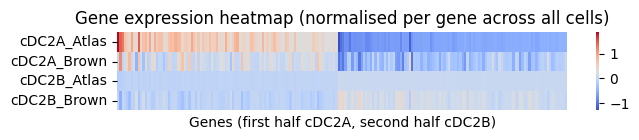

In [124]:
plt.figure(figsize=(7, 1.5))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=False)
plt.title("Gene expression heatmap (normalised per gene across all cells)")
plt.ylabel("")
plt.xlabel("Genes (first half cDC2A, second half cDC2B)")
plt.xticks([], [])
plt.tight_layout()
plt.show()

# z score between groups

In [125]:
# normalise (z-score) across rows (per gene)
heatmap_data_z = heatmap_data.apply(zscore, axis=0)

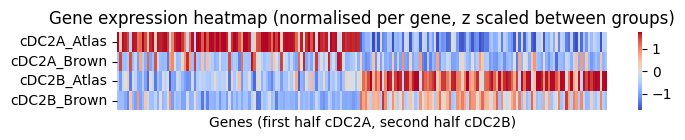

In [130]:
plt.figure(figsize=(7.5, 1.5))
sns.heatmap(heatmap_data_zscored, cmap="coolwarm", annot=False)
plt.title("Gene expression heatmap (normalised per gene, z scaled between groups)")
plt.ylabel("")
plt.xlabel("Genes (first half cDC2A, second half cDC2B)")
plt.xticks([], [])
plt.tight_layout()
plt.savefig("heatmap_Atlas_v_Brown_ZZ.pdf", format="pdf")
plt.show()